# Clustering Homeless Encampment Insights on Los Angeles' 311 data for 2021

Michael Gonzalez

This notebook will outlines the use of three clustering algorithms to organize 311 requests data by the request type of homeless encampment with the latitude and longitude vales. The data will be loaded into dataframes and subset in pandas. The plots will be created in seaborn and matplotlib libraries. There will be additional numerical operations that will be using the numpy library. I will be performing K-Means and DBSCAN with the scikit-learn library. HDBSCAN will be done with hdbscan library.

## Brief Overview 

I would need to import the necessary libraries for global data handling tasks and open the data  with pandas. I also need to set a number of global variables that will manage the data flow, this will include the location of the data file. This will also show how far back the clustering operation will reach and how many clusters will evaluate the optimal number of clusters. After setting the global variables, the subset data will be at an manageable size and this will lead to better capture of recent trends.

## Importing the needed Python libraries 

In [8]:
# Importing needed libraries.
import random
import math
import hdbscan
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pandas import DataFrame
import matplotlib.pyplot as plt

## Loading the data set, creating global variables and checking the output

In [9]:
# Creating global varibles for this notebook.
data2021 = '...\MyLA311_Service_Request_Data_2021.csv'
INTEREST = 'Homeless Encampment' # This is the varible of my interest for this dataset.
SUBSET = 10000 # Selecting the last subset rows of data.
SWEEPMAX = 30 # Selecting the number of clusters for comparisons.

# Creating a data frame.
dataset = pd.read_csv(data2021)

# Creating a missing data subset
#dataset = dataset[np.logical_not(np.isnan(dataset['Longitude']))]

if len(INTEREST) > 0:
    varFilter = dataset['RequestType'] == INTEREST
    dataset = dataset[varFilter]
    
if SUBSET:
    dataset = dataset[-SUBSET:]

# Displaying the top five rows.
dataset.head(5)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
770298,1-1996868161,07/03/2021 07:52:00 AM,07/12/2021 05:58:09 AM,SR Created,LASAN,Homeless Encampment,Pending,Mobile App,iOS,N,...,"(34.0492955074, -118.437373302)",632.0,B,4.0,West Los Angeles APC,5.0,Paul Koretz,62.0,Westside,WEST LOS ANGELES
770300,1-1996868261,07/03/2021 07:54:22 AM,07/06/2021 07:10:38 AM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,iOS,N,...,"(34.0371300862, -118.270098076)",634.0,D,6.0,Central APC,14.0,Kevin de León,52.0,Downtown Los Angeles,CENTRAL
770321,1-1996870751,07/03/2021 08:08:01 AM,07/12/2021 05:07:26 AM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,iOS,N,...,"(34.0266478595, -118.241052741)",634.0,G,7.0,Central APC,14.0,Kevin de León,52.0,Downtown Los Angeles,NEWTON
770330,1-1996875431,07/03/2021 08:13:15 AM,07/24/2021 08:39:07 AM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,iOS,N,...,"(33.9959986975, -118.481392924)",671.0,F,5.0,West Los Angeles APC,11.0,Mike Bonin,68.0,Venice,PACIFIC
770338,1-1996875811,07/03/2021 08:18:42 AM,07/12/2021 06:08:24 AM,SR Created,LASAN,Homeless Encampment,Pending,Mobile App,Android,N,...,"(34.0276747066, -118.260516485)",634.0,E,7.0,South Los Angeles APC,9.0,Curren D. Price Jr.,78.0,South Central,NEWTON


## Data Visualizations 

In this next section of the notebook. I will talk about my process with K-Means, DBSCAN and HDBSCAN with the visualization of my results.

## K-Means Clustering Overview 

This overview will include clustered points of the data. These clustered points will not include the measurement of density in single clusters. The resulting centroids will have off centered masses.

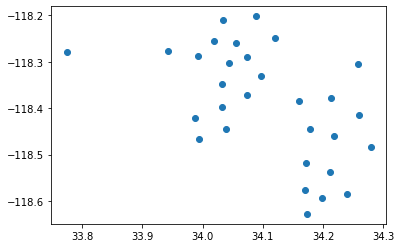

In [10]:
# Selecting the data frame to a varaible.
K = DataFrame(dataset, columns = ['Latitude', 'Longitude'])

km = KMeans(n_clusters = 30,
           init = 'random',
           n_init = 15,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)

y_km = km.fit_predict(K)

# Displaying a scatterplot of the result.
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.show()

## Assessing Model Fit Overview 

This overview will test for a well rounded number to be used for the final number of cluster. This distortion function will train a model with a vareity of cluster thresholds. It will assess the sum of squared distance from the centroid. When compared to the K-Means scatterplot.

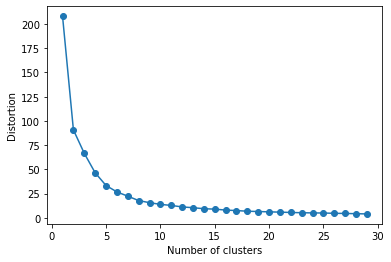

In [11]:
# Creating a distortion array with a K-Means function.
distortions = []

for i in range(1, SWEEPMAX):
    km = KMeans(
        n_clusters = i,
        init = 'random',
        n_init = 15,
        max_iter = 300,
        tol = 1e-04,
        random_state = 0)
    km.fit(K)
    distortions.append(km.inertia_)
    
# Displaying a line plot of the K-means function.
plt.plot(range(1, SWEEPMAX), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As you can see in the above plot, the range between 5 to 10 clusters is the best option.

## K-Means with new number of clusters overview 

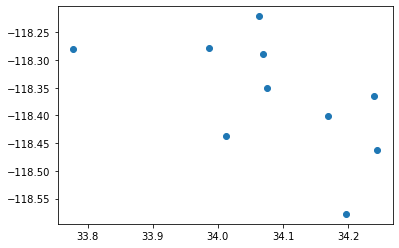

In [12]:
# Selecting the data frame to a variable.
K = DataFrame(dataset, columns = ['Latitude','Longitude'])

km = KMeans(n_clusters = 10, 
    init = 'random',
    n_init = 15,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0)

y_km = km.fit_predict(K)

# Displaying a scatterplot of the result.
plt.scatter(km.cluster_centers_[ :, 0], km.cluster_centers_[ :, 1])
plt.show()

## DBSCAN Clustering Overview  

DBSCAN takes into account of the cluster's density. The cluster's connects with many nearby neighbors and are more likely to belong to a shared cluster.

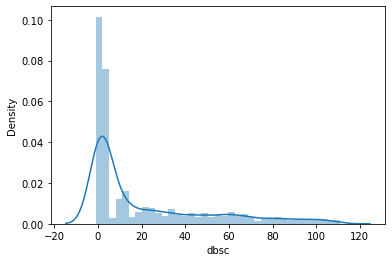

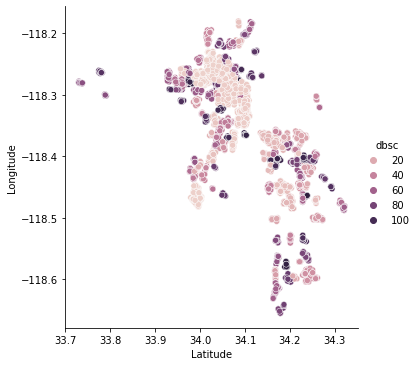

In [13]:
# Selecting the parameters for DBSCAN plot.
dbsc = DBSCAN(eps = .005, min_samples = 15).fit(K)

# Adding a new column called 'dbsc'.
dataset['dbsc'] = dbsc.labels_

# Displaying the 'dbsc' through a plot.
sns.distplot(dataset['dbsc'])
sns.relplot(x = 'Latitude', y = 'Longitude', hue = 'dbsc', data = dataset[dataset['dbsc'] > 0])
plt.show()

These plots displays a minimum number of points that are required to be in each of the clusters. The points that are close to zero represent either diffuse clusters or clusters that were hard to be assigned.

## HDBSCAN Overview 

HDBSCAN stands for hierarchical method of clustering built on top of DBSCAN. It also has more sections that are related to the cluster's density.

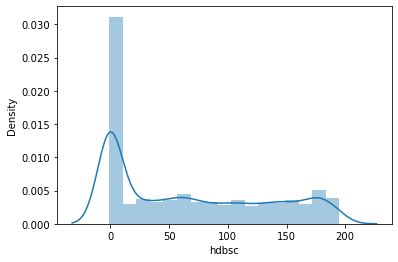

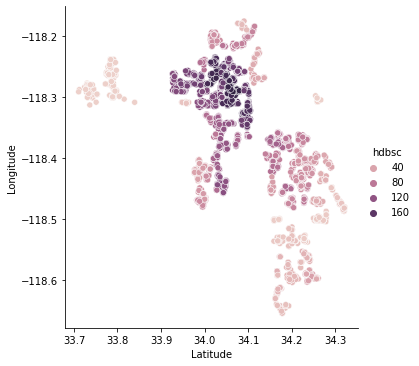

In [14]:
# Selecting the minimum number of cluters.
hdbsc = hdbscan.HDBSCAN(min_cluster_size = 15) 

# Adding a new column called 'hdbsc'.
hdbsc.fit(K)
dataset['hdbsc'] = hdbsc.labels_

# Displaying the 'hdbsc' through a plot.
sns.distplot(dataset['hdbsc'])
sns.relplot(x = 'Latitude', y = 'Longitude', hue = 'hdbsc', data = dataset[dataset['hdbsc'] > 0])
plt.show()

These plots displays a minimum number of points that are required to be in each of the clusters. The points that are close to zero represent either diffuse clusters or clusters that were hard to be assigned.